# Numerically solving and plotting a system of Ordinary Differential Equations

We are approximating the solution to $y'(t) = f(t,y)$ subject to $y(0)=y_0$ from $t=0$ to $t=T$. $y$ is an $n$-vector.

$x$[state,time index] is a matrix where state = 0 is always time, and the other n states correspond to the $n$ components in the unknown $n$-vector $y$.

Since we want to plot each component of $y$ over time, we will need to record $y$ at each time step.

In [6]:
# %pylab inline  #if you uncomment this, you do not need to specify "np." or "np.linalg." in the code.
import time
import numpy as np
import matplotlib.pyplot as plt

In [7]:
initial_y_value = [10.0, 0.1, 0.0]  #Value of each y_i at t = 0
h = 0.01  # h is the time step, delta t
T = 14.0  # T is the time where we want to approximate the unknown function y.  
         # T needs to be an integer multiple of h.
N = int(T/h)

n = len(initial_y_value)

x = np.zeros((n+1,N+1))  # n+1 because the 0th entry is time. N+1 because we have both t=0 and t=T


In [8]:
def f(x):  #This returns the output of the function f for which x'=f(x) 
    func = np.zeros(n+1)
    func[0] = 1.0
    
    #SIR model
    beta = 0.6 # proportion of susceptible that become infected
    gamma = 1.9 # proportion of infected that recover
    mu = 0.2  # proportion of recovered that become susceptible
    
    #Change this to anything else to test for this other case
    #DON'T FORGET TO CHANGE T

    
    #Using the differential functions given in the problem statement
    func[1] = (((-beta)*x[1]*x[2]) + (mu*x[3])) #dS
    func[2] = ((beta*x[1]*x[2]) - (gamma*x[2])) #dI
    func[3] = ((gamma*x[2]) - (mu*x[3])) #dR
    
    return func

In [9]:
#MAIN
start = time.process_time()

x[0,0] = 0  #initial t value
x[1:,0] = initial_y_value

for i in range (N):
    dy = f(x[:,i])*h
    x[:,i+1] = x[:,i]+dy
    #print("i is:",i, "and the column is:",x[:,i]) #code for debugging
    

print("This took", time.process_time() - start, "seconds.")


This took 0.046875 seconds.


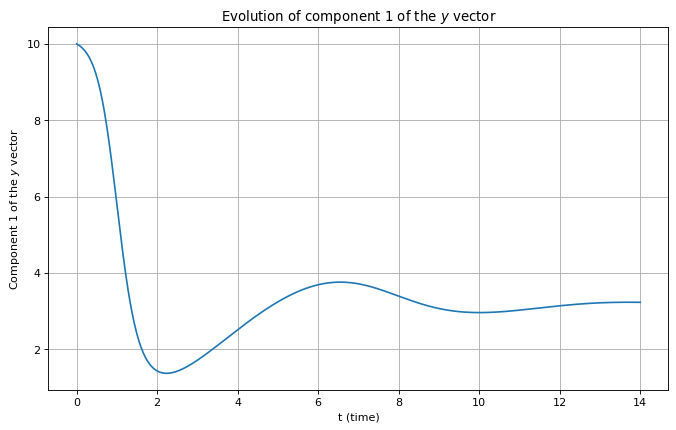

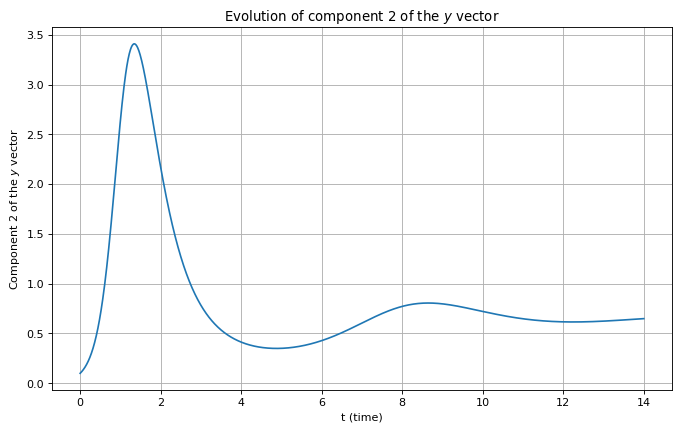

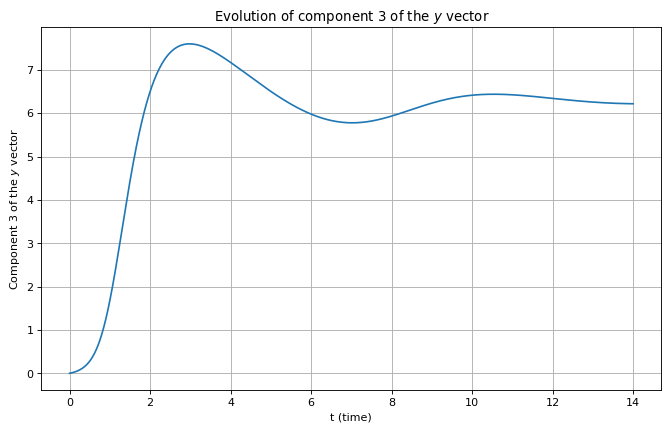

In [10]:
t_plot = x[0,:]

for i in range(1,n+1):
    plt.figure(figsize=(10, 6), dpi=80)
    plt.plot(t_plot,x[i,:])
    plt.title("Evolution of component " + str(i) + " of the $y$ vector")
    plt.xlabel('t (time)'); plt.ylabel("Component " + str(i) + " of the $y$ vector")
    plt.grid()


In [16]:
 #***Code from old attempt where I forgot you could do operations on the whole vector at the same time***
    
 #   dYdt = f(x[:,i])
 #   dS = dYdt[1]
 #   dI = dYdt[2]
 #   dR = dYdt[3]
 #   print("i is:",i,"; and the current column is:",x[:,i])
 #   x[0,i+1] = x[0,i] + h #could multiply h by f(x[:,i])[0], but that value is always 1 so I chose not to.
 #   x[1,i+1] = x[1,i] + dS*h
 #   x[2,i+1] = x[2,i] + dI*h
 #   x[3,i+1] = x[3,i] + dR*h